# PHYS 267 - Final Project
**Group:** Taha Farooqui, Samantha Lee, Darshak Patel

**Topic:** Astronomy & Astrophysics

## **1.0 Loading in the Data**

In [4]:
# Import Statements
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the Data and Organizing into a Dataframe
#os.chdir("/content/PHYS267-AstroProjectData") # changing the directory to wear the data CSV file is
astro_data_df = pd.read_csv("PHYS267_DataSet_Astrophysics_StarFlux_Full.csv")

In [5]:
astro_data_df.head()

,Time(BJD-2454833),Flux,Uncertainty(1 std. dev),Orientation
0,112.742,1.00896,0.00163,3
1,112.867,1.00886,0.00157,3
2,113.018,1.00890,0.00158,3
3,113.234,1.00867,0.00161,3
4,113.338,1.00898,0.00161,3


## **2.0 Qualitative Analysis**

**Qualitative Analysis:**
*   Scatter Plot w/ error bars - Make our qualitative conclusions about the main question
*   Histogram - Make our qualitative conclusion about the main quesiton
*   Discuss which form of presentation is better and why!



















### **2.1 Creating the Scatter Plot and Histogram Plot**

C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\2331344975.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\2331344975.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


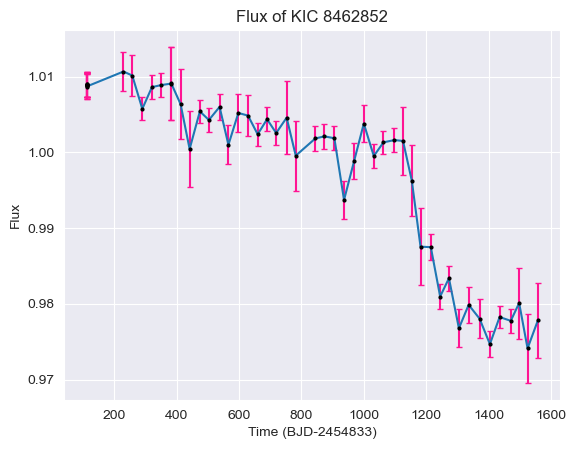

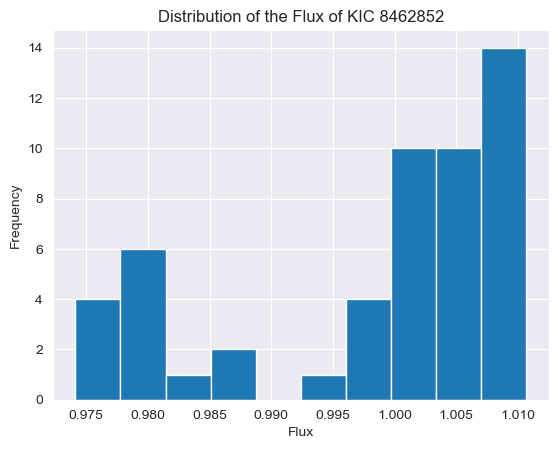

In [6]:
# Plotting the Scatter plot with error bars
sns.set_style("darkgrid") # Setting plot style for plots

fig1, ax1 = plt.subplots()
ax1.errorbar(astro_data_df['Time(BJD-2454833)'], astro_data_df['Flux'], yerr=astro_data_df['Uncertainty(1 std. dev)'], ecolor="deeppink", marker='o',
             markersize=2, capsize=2, mfc='k', mec='k')

# Plotting posterior 
ax1.set_xlabel("Time (BJD-2454833)")
ax1.set_ylabel("Flux")
ax1.set_title("Flux of KIC 8462852")
fig1.show()

# Plotting the Bar Chart
fig2, ax2 = plt.subplots()
ax2.hist(astro_data_df['Flux'])

ax2.set_xlabel("Flux")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of the Flux of KIC 8462852")
fig2.show()

fig1.savefig('Plots/ScatterFluxPlot.pdf', bbox_inches='tight')
fig1.savefig('Plots/ScatterFluxPlot.png', bbox_inches='tight')
fig2.savefig('Plots/HistogramFluxPlot.pdf', bbox_inches='tight')
fig2.savefig('Plots/HistogramFluxPlot.png', bbox_inches='tight')

## **3.0 Quantitative Analysis**

**Section B - Quantitative Analysis**


*   Check for Normalcy - helps determine whether we should use parametric or non-parametric test later
*   Check for Randomness using a Runs Test
*   Model Fitting - Line/Curve best fit (discuss the sign of the slope(s))
*   Hypothesis Testing: The star flux stays the same with time (Null)
*   Sub Question: Does the orientation affect the the measured flux and our trend?
Model Fitting to Independent sets of data split by plate orientation
> *   Discuss the trend line and slope(s) - are they the same? Within uncertainty of each other?

*   According to Literature (the paper), the star dimmed at a rate of 0.341 ± 0.041% yr−1. We can crudely try to find this value. We know that the orientation of the plates switch every 3 months so we consider the flux at the start of a specific orientation number and when it first reorients again to that numbers (for example, Time: 112.742 and Time: 474.535 for data point one for orientation #3)

### **3.1 Checking for Normalcy**

In [7]:
# Importing in appropriate library
import scipy.stats as stats

# Running the Normalcy Test on the Flux Data
stat_3p1, pNorm_3p1 = stats.normaltest(astro_data_df['Flux'])

# Printing our results
print("The normalcy statisitc is", stat_3p1, "and the corresponding p-value is", pNorm_3p1)
print("")

# Conclusion
if pNorm_3p1 > 0.05:
    print("We confirm the data is distributed normally with p-value of", pNorm_3p1)
else:
    print("We confirm the data is NOT distributed normally with p-value of", pNorm_3p1)

The normalcy statisitc is 8.47855147842819 and the corresponding p-value is 0.014418030476593782

We confirm the data is NOT distributed normally with p-value of 0.014418030476593782


### **3.2 Checking data for Randomness using a Runs Test**

In [8]:
# Since the data is NOT NORMAL, we can use the NON-PARAMETRIC Runs Test to test for randomness
# For the Runs Test which our Null Hypothesis and Alternative Hypothesis is: 
# H0 (null): The data WAS produced from a random source
# Ha (alternative): The data WAS NOT produced from a random source

# Importing in the Runs Test
from statsmodels.sandbox.stats.runs import runstest_1samp  

# Running the test
t_stat_3p2, pval_3p2 = runstest_1samp(astro_data_df['Flux'], correction=False)

# Printing our results
print("The t-statistic is", t_stat_3p2, " and the corresponding p-value is", pval_3p2)
print("")

# Conclusion
if pval_3p2 < 0.05 :
    print("Since p-value is < 0.05, we REJECT the null hypothesis and so the data WAS NOT randomly generated!")
else:
    print("Since p-value is >=0.05, we ACCEPT the null hypothesis and there is a likelyhood that the data WAS randomly generated!")

The t-statistic is -6.286792689889868  and the corresponding p-value is 3.2409169299608917e-10

Since p-value is < 0.05, we REJECT the null hypothesis and so the data WAS NOT randomly generated!


### **3.3 Model Fitting the Scatter Plot Data**

In [33]:
# Import Statements
from sklearn.metrics import r2_score

# We will use a loop to optimize the model fitting
# Defining the best fit function that will take in the best fittig degree, xvalues and yvalues and return the R2 value for that fit
def bestfit(degree, xvalues, yvalues):
    
    fit_parameters = np.empty(degree + 1) # intializing an array to hold all the fit paramters for the degree
    fit_parameters = np.polyfit(xvalues, yvalues, degree) # applying the fit and saving the fit parameters
    
    # obtaining the appropriate exponent numbers for the degree
    exponents = np.arange(0, degree+1,1)
    exponents = exponents[::-1]

    model = 0 # initialzing
    # using the exponents and fit parameters to calulcate the model yvalues
    for i,param in zip(exponents, fit_parameters):
        model += param*xvalues**i
        
    model_R2 = r2_score(yvalues, model)  # computing the rscore using the actauly yvalues compared to the model yvalues
    return(model_R2, fit_parameters)

# Running the Optimization Loop
num_iter = 11 # max number of loop optimization iterations
degree = 0 # starting degree for fit
R2_wanted = 0.98

for i in range(num_iter): # the optimization loop
    bestfit_R2, fit_params = bestfit(degree, astro_data_df['Time(BJD-2454833)'], astro_data_df['Flux']) # We start with a 0th order model 
    print("Degree:",degree," \tR2:", round(bestfit_R2,6), " \tFit Params:", np.round(fit_params,4))
    degree += 1

print('''
-------------------------------------------------------------------------------
''')

# Printing out the final degree fit parameters       
print("The best fit is obtained at degree:",degree)
print("The R2 value is:",bestfit_R2)
print("The fit paramters (not rounded) are:",fit_params)
          

print('''
-------------------------------------------------------------------------------

Note: So we ran the optimization code with the stopping point being
when we get a R2 value of atleast 0.98. The R2 never goes over 0.98 even after
the degree became >20. This caused NUMPY to through the following error:

RankWarning: Polyfit may be poorly conditioned

Essntially, this is telling us to use a lower degree order. We will settle with
a degree of 10!

-------------------------------------------------------------------------------
''')

Degree: 0  	R2: 0.0  	Fit Params: [0.9984]
Degree: 1  	R2: 0.799334  	Fit Params: [-0.      1.0156]
Degree: 2  	R2: 0.89809  	Fit Params: [-0.      0.      1.0074]
Degree: 3  	R2: 0.901133  	Fit Params: [-0.      0.     -0.      1.0094]
Degree: 4  	R2: 0.911669  	Fit Params: [ 0.0000e+00 -0.0000e+00  0.0000e+00 -1.0000e-04  1.0154e+00]
Degree: 5  	R2: 0.942687  	Fit Params: [ 0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  2.000e-04  9.962e-01]
Degree: 6  	R2: 0.942827  	Fit Params: [ 0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  1.000e-04
  9.988e-01]
Degree: 7  	R2: 0.946389  	Fit Params: [-0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00 -0.0000e+00  0.0000e+00
 -3.0000e-04  1.0262e+00]
Degree: 8  	R2: 0.955507  	Fit Params: [-0.      0.     -0.      0.     -0.      0.     -0.      0.0014  0.9343]
Degree: 9  	R2: 0.95608  	Fit Params: [-0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00
  0.000e+00 -0.000e+00  4.000e-04  9.853e-01]
Degree: 10  	R2: 0.962191  	Fit Pa

C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\3690660865.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


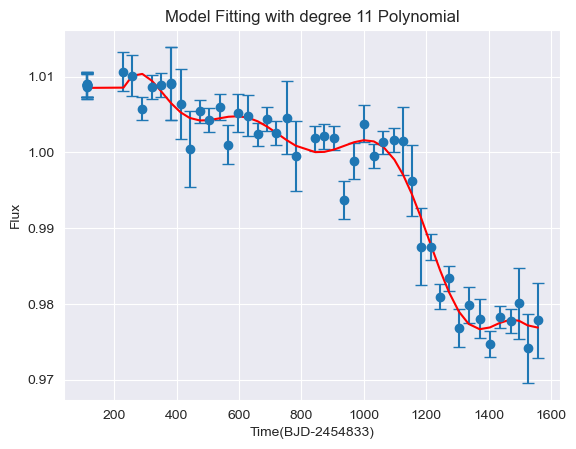

In [36]:
# Plotting the Scatter plot with error bars
sns.set_style("darkgrid") # Setting plot style for plots

# Plotting the Bar Chart
fig2, ax2 = plt.subplots()
ax2.errorbar(astro_data_df['Time(BJD-2454833)'],astro_data_df['Flux'],yerr=astro_data_df['Uncertainty(1 std. dev)'], fmt='o', capsize=4)
ax2.plot(astro_data_df['Time(BJD-2454833)'], np.polyval(fit_params, astro_data_df['Time(BJD-2454833)']),color='red')
ax2.set_xlabel("Time(BJD-2454833)")
ax2.set_ylabel("Flux")
ax2.set_title("Model Fitting with degree 11 Polynomial")


fig2.show()


### **3.4 Hypothesis Testing**

In [10]:
# Null Hypothesis: The Flux of the star DOES NOT change significantly
# Alternative Hypothesis: The Flux of the star DOES change significantly

# We saw earlier that the dataset is NOT NORMAL hence, we need to use a NON-PARAMETRIC Test
# We will use: scipy.stats.wilcoxon(data-checkValue)

from scipy.stats import wilcoxon

# Our Null argues that the flux of the star doee not change significantly thus,
# our check value will be the flux the star initially starts off with 
flux_checkValues = astro_data_df['Flux'][0]
flux_differences = [flux - flux_checkValues for flux in astro_data_df['Flux']]

# Running the test!
wrank_3p4, wrank_pVal_3p4 = wilcoxon(flux_differences)
print("Rank:", wrank_3p4, "| p-Value:", wrank_pVal_3p4)
print("")

# Conclusion
if wrank_pVal_3p4 < 0.05:
    print("Since p-value < 0.05, we can reject the null hypothesis; concluding there is a significant change in the star's flux!")
else:
    print("Since p-value > 0.05, we accept the null hypothesis; concluding there is no significant change in the star's flux!")

Rank: 42.0 | p-Value: 5.8523554823110256e-09

Since p-value < 0.05, we can reject the null hypothesis; concluding there is a significant change in the star's flux!


### **3.5 Moments of the Histogram**

In [11]:
import scipy.stats

# 1st Raw Moment: Mean
mean = np.mean(astro_data_df['Flux'])
print("Mean: ", mean)

# 2nd Central Moment: Variance
var = np.var(astro_data_df['Flux'])
print("Variance: ", var)

# 3rd Standardized Moment: Skew
skew = scipy.stats.skew(astro_data_df['Flux'])
print('Skew: ', skew)
# 4th Standardized Moment: Kurtosis
kurtosis = scipy.stats.kurtosis(astro_data_df['Flux'])
print("Kurtosis: ", kurtosis + 3)

Mean:  0.9984457692307696
Variance:  0.00013334942056213018
Skew:  -0.9502798625650863
Kurtosis:  2.388627204084122


### **3.6 How does the orientation affect the measured flux and our trend?**

#### **3.6.1 Plots based on Orientation**

C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\1220545653.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


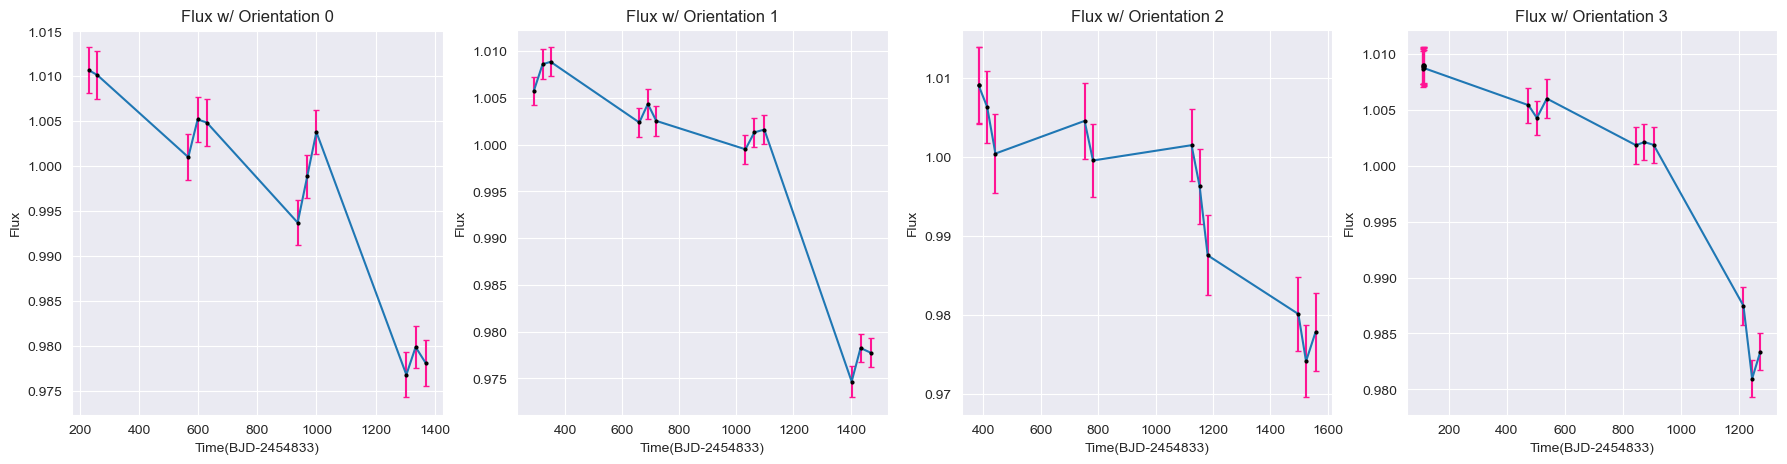

In [12]:
# Plotting the Scatter plot with error bars
sns.set_style("darkgrid") # Setting plot style for plots

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(22,5))

ax1.errorbar(astro_data_df[astro_data_df['Orientation'] == 0]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 0]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 0]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
ax2.errorbar(astro_data_df[astro_data_df['Orientation'] == 1]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 1]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 1]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
ax3.errorbar(astro_data_df[astro_data_df['Orientation'] == 2]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 2]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 2]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
ax4.errorbar(astro_data_df[astro_data_df['Orientation'] == 3]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 3]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 3]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')


# Plotting posterior
plot_titles = ['Flux w/ Orientation 0','Flux w/ Orientation 1','Flux w/ Orientation 2','Flux w/ Orientation 3']
axes = [ax1,ax2,ax3,ax4]
xlabel = "Time(BJD-2454833)"
ylabel = 'Flux'

for a,title in zip(axes,plot_titles):
  a.set_title(title)
  a.set_xlabel(xlabel)
  a.set_ylabel(ylabel)

fig.show()

fig.savefig('Plots/FluxOrientationComparion.pdf', bbox_inches='tight')
fig.savefig('Plots/FluxOrientationComparion.png', bbox_inches='tight')

#### **3.6.2 Fitting a Linear Model**

In [13]:
# Using the previous bestfit function
bestfit_Orient0_R2, fit_params_Orient0 = bestfit(1, astro_data_df[astro_data_df['Orientation'] == 0]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 0]['Flux']) 
bestfit_Orient1_R2, fit_params_Orient1 = bestfit(1, astro_data_df[astro_data_df['Orientation'] == 1]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 1]['Flux']) 
bestfit_Orient2_R2, fit_params_Orient2 = bestfit(1, astro_data_df[astro_data_df['Orientation'] == 2]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 2]['Flux']) 
bestfit_Orient3_R2, fit_params_Orient3 = bestfit(1, astro_data_df[astro_data_df['Orientation'] == 3]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 3]['Flux']) 

# Printing out the best fit parameters
print("Orientation {num}: Slope {slope} | Intercept {intercept}".format(num=0, slope=fit_params_Orient0[0], intercept=fit_params_Orient0[1]))
print("Orientation {num}: Slope {slope} | Intercept {intercept}".format(num=1, slope=fit_params_Orient1[0], intercept=fit_params_Orient1[1]))
print("Orientation {num}: Slope {slope} | Intercept {intercept}".format(num=2, slope=fit_params_Orient2[0], intercept=fit_params_Orient2[1]))
print("Orientation {num}: Slope {slope} | Intercept {intercept}".format(num=3, slope=fit_params_Orient3[0], intercept=fit_params_Orient3[1]))

Orientation 0: Slope -2.832681014663197e-05 | Intercept 1.020308681606724
Orientation 1: Slope -2.524819525667677e-05 | Intercept 1.0192932119980982
Orientation 2: Slope -2.452196261149108e-05 | Intercept 1.0184133547621992
Orientation 3: Slope -1.8865628860738636e-05 | Intercept 1.012341848000907


#### **3.6.3 Recreating Plots with Best Fit Lines**

C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\501804165.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


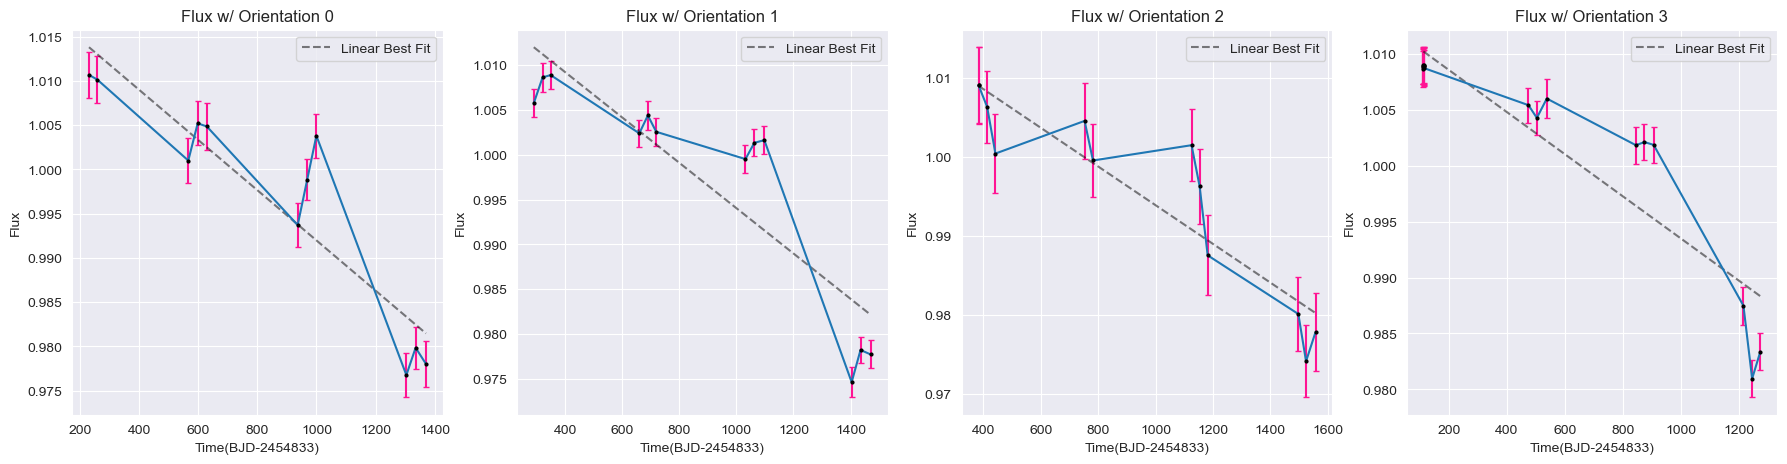

In [14]:
# Plotting the Scatter plot with error bars
sns.set_style("darkgrid") # Setting plot style for plots

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(22,5))

# Orientation 0
ax1.errorbar(astro_data_df[astro_data_df['Orientation'] == 0]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 0]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 0]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
model_fit_yOrient0 = fit_params_Orient0[0]*astro_data_df[astro_data_df['Orientation'] == 0]['Time(BJD-2454833)'] + fit_params_Orient0[1]
ax1.plot(astro_data_df[astro_data_df['Orientation'] == 0]['Time(BJD-2454833)'], model_fit_yOrient0, '--k', alpha=0.5, label='Linear Best Fit')

# Orientation 1
ax2.errorbar(astro_data_df[astro_data_df['Orientation'] == 1]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 1]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 1]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
model_fit_yOrient1 = fit_params_Orient1[0]*astro_data_df[astro_data_df['Orientation'] == 1]['Time(BJD-2454833)'] + fit_params_Orient1[1]
ax2.plot(astro_data_df[astro_data_df['Orientation'] == 1]['Time(BJD-2454833)'], model_fit_yOrient1, '--k', alpha=0.5, label='Linear Best Fit')

# Orientation 2
ax3.errorbar(astro_data_df[astro_data_df['Orientation'] == 2]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 2]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 2]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
model_fit_yOrient2 = fit_params_Orient2[0]*astro_data_df[astro_data_df['Orientation'] == 2]['Time(BJD-2454833)'] + fit_params_Orient2[1]
ax3.plot(astro_data_df[astro_data_df['Orientation'] == 2]['Time(BJD-2454833)'], model_fit_yOrient2, '--k', alpha=0.5, label='Linear Best Fit')

# Orientation 3
ax4.errorbar(astro_data_df[astro_data_df['Orientation'] == 3]['Time(BJD-2454833)'], astro_data_df[astro_data_df['Orientation'] == 3]['Flux'], yerr=astro_data_df[astro_data_df['Orientation'] == 3]['Uncertainty(1 std. dev)'], 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
model_fit_yOrient3 = fit_params_Orient3[0]*astro_data_df[astro_data_df['Orientation'] == 3]['Time(BJD-2454833)'] + fit_params_Orient3[1]
ax4.plot(astro_data_df[astro_data_df['Orientation'] == 3]['Time(BJD-2454833)'], model_fit_yOrient3, '--k', alpha=0.5, label='Linear Best Fit')

# Plotting posterior
plot_titles = ['Flux w/ Orientation 0','Flux w/ Orientation 1','Flux w/ Orientation 2','Flux w/ Orientation 3']
axes = [ax1,ax2,ax3,ax4]
xlabel = "Time(BJD-2454833)"
ylabel = 'Flux'

for a,title in zip(axes,plot_titles):
  a.set_title(title)
  a.set_xlabel(xlabel)
  a.set_ylabel(ylabel)
  a.legend(loc='best')

fig.show()

fig.savefig('Plots/FluxOrientationComparionWithTrendLine.pdf', bbox_inches='tight')
fig.savefig('Plots/FluxOrientationComparionWithTrendLine.png', bbox_inches='tight')

C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\3191164091.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


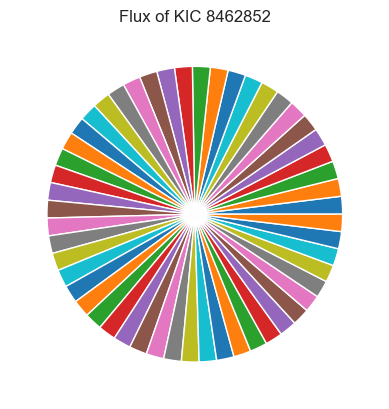

In [16]:
# Plotting the Scatter plot with error bars
sns.set_style("darkgrid") # Setting plot style for plots

fig, ax = plt.subplots()
ax.pie(astro_data_df['Flux'])

# Plotting posterior 
ax.set_title("Flux of KIC 8462852")
fig.show()

fig.savefig('Plots/PieFluxPlot.pdf', bbox_inches='tight')
fig.savefig('Plots/PieFluxPlot.png', bbox_inches='tight')

### **3.7 Determining the Dimming Rate per Year of the Star**

UM..... so with the method outlined in the start of the coding block we get a
dimming rate of -0.009. This is very small compared to the 0.341 that they state
in literature sooooo maybe we don't include this stuff in our report?

If we do, we need to mention what might be the reason(s) for why our value is 
so much more different than the literature one!

Slope -0.00922 +/- 0.00249 | Intercept 1.02028


C:\Users\shinc\AppData\Local\Temp\ipykernel_23264\3523365266.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


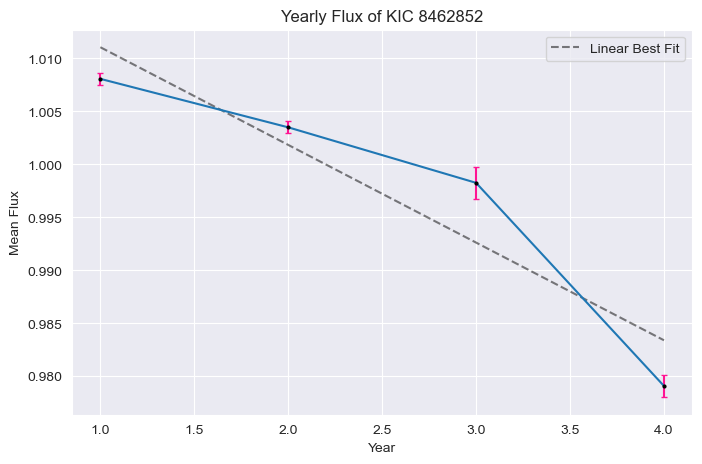

In [15]:
# To make our crude estimatation of the dimming rate will base it off of the changes in the orientation
# We know that the orientation of the plates switch every 3 months so we consider the flux at the start
# of a specific orientation number and when it first reorients again to that numbers 
# (for example, Time: 112.742 and Time: 474.535 for data point one for orientation #3)

# start and stop index that define a year's worth of data
year_1 = [112.742,474.535]
year_2 = [474.535, 844.444]
year_3 = [844.444, 1214.517]
year_4 = [1214.517, 1557.495]

# Splitting the data by 'year'
year_1_data = astro_data_df[astro_data_df['Time(BJD-2454833)'].between(112.742, 474.535)]
year_2_data = astro_data_df[astro_data_df['Time(BJD-2454833)'].between(474.535, 844.444)]
year_3_data = astro_data_df[astro_data_df['Time(BJD-2454833)'].between(844.444, 1214.517)]
year_4_data = astro_data_df[astro_data_df['Time(BJD-2454833)'].between(1214.517, 1557.495)]

# Computing the average/mean flux of the star in each year
yearly_flux_mean = [year_1_data.mean()[1], year_2_data.mean()[1], year_3_data.mean()[1], year_4_data.mean()[1]]

# Computing the standard error in the mean
yearly_flux_SEM = [year_1_data.sem()[1], year_2_data.sem()[1], year_3_data.sem()[1], year_4_data.sem()[1]]

# Fitting a Linear Model
years = np.array([1,2,3,4])
bestfit_yearlytrend_R2, fit_params_yearlytrend = bestfit(1, years, yearly_flux_mean) 
slope_error = scipy.stats.linregress(years,yearly_flux_mean)[4]
print("Slope {slope} +/- {slope_err} | Intercept {intercept}".format(slope=round(fit_params_yearlytrend[0],5), slope_err=round(slope_error,5), 
                                                                     intercept=round(fit_params_yearlytrend[1],5)))

# Plotting to Visualize the trend
sns.set_style("darkgrid") # Setting plot style for plots

fig, ax1 = plt.subplots(1,1, figsize=(8,5))

ax1.errorbar(years, yearly_flux_mean, yerr=yearly_flux_SEM, 
             ecolor="deeppink", marker='o', markersize=2, capsize=2, mfc='k', mec='k')
yearlTrend_model_fit_y = fit_params_yearlytrend[0]*years + fit_params_yearlytrend[1]
ax1.plot(years, yearlTrend_model_fit_y, '--k', alpha=0.5, label='Linear Best Fit')

# Plotting posterior
ax1.set_title('Yearly Flux of KIC 8462852')
ax1.set_xlabel("Year")
ax1.set_ylabel("Mean Flux")
ax1.legend(loc='best')

fig.show()

fig.savefig('Plots/YearlyFluxTrend.pdf', bbox_inches='tight')
fig.savefig('Plots/YearlyFluxTrend.png', bbox_inches='tight')